Libraries Installation
    

In [0]:
# TODO
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn import svm
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

%matplotlib inline

Data Loading

In [2]:
# TODO
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# TODO
!ls /content/drive/My\ Drive/'Colab Notebooks'

 bigmart_data.csv
'Copy of Copy of Untitled3 (1).ipynb'
'Copy of Copy of Untitled3.ipynb'
'Copy of Copy of Week4_PythonProgramming_Homework.ipynb'
'Copy of Copy of Week5_PythonProgramming_Homework1.ipynb'
'Copy of tensorboard.ipynb'
'Copy of Untitled3.ipynb'
'Copy of Untitled4.ipynb'
'Copy of Week09_unsupervised-learning.ipynb'
'Copy of Week3_PythonProgramming_Homework (1).ipynb'
'Copy of Week3_PythonProgramming_Homework.ipynb'
'Copy of Week4_PythonProgramming_Homework (1).ipynb'
'Copy of Week4_PythonProgramming_Homework (2).ipynb'
'Copy of Week4_PythonProgramming_Homework (3).ipynb'
'Copy of Week4_PythonProgramming_Homework (4).ipynb'
'Copy of Week4_PythonProgramming_Homework.ipynb'
'Copy of Week5_PythonProgramming_Homework (1).ipynb'
'Copy of Week5_PythonProgramming_Homework1.ipynb'
'Copy of Week5_PythonProgramming_Homework.ipynb'
'Copy of Week6_intro_to_visualization.ipynb'
'Copy of Week8_LogisticRegression_Homework.ipynb'
'Copy of Welcome To Colaboratory'
'Copy of Welcome To Colabo

In [4]:
# TODO
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/LTV.csv')
data.shape


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(657697, 17)

Data Exploration

In [0]:
data.head()

,CallID,PhoneNumber_AreaCode,MarketingProgram,Channel,ZipCode_IVR,BAUPriority,HasOrdered,LTV,IP_geo_edge_conn_speed,IP_geo_edge_metro_code,IP_geo_edge_postal_code,IP_geo_edge_region,UA_ua_browserName,UA_ua_browserVersion,UA_ua_osName,UA_ua_primaryHardwareType,UA_ua_vendor
0,3001627717W0190516,626.0,fuse-frin-default,Online Natural Search,unknown,50,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3001615504M0190206,817.0,paid-fr-infr-google-mobile-brand-fios-tp-com,Online Paid Search,unknown,50,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3001101054K0181231,860.0,paid-fr-frin-google-desktop-brand-vantage-tp-ftr,Online Paid Search,unknown,50,1,381.416197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001207281K0181226,505.0,RSW Consumer Brands (VZ Volume),Cross Sell,unknown,75,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001172750K0181224,941.0,VZN to FTR IVR Transfers CTF Existing Selects,Other,unknown,20,1,44.629498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_new = data.drop(["BAUPriority", "HasOrdered", "UA_ua_browserName", "UA_ua_browserVersion", "UA_ua_browserName", "UA_ua_osName" ,"UA_ua_primaryHardwareType", "UA_ua_vendor","CallID"], axis =1)
data_new.head(3)

,PhoneNumber_AreaCode,MarketingProgram,Channel,ZipCode_IVR,LTV,IP_geo_edge_conn_speed,IP_geo_edge_metro_code,IP_geo_edge_postal_code,IP_geo_edge_region
0,626.0,fuse-frin-default,Online Natural Search,unknown,0.000000,NaN,NaN,NaN,NaN
1,817.0,paid-fr-infr-google-mobile-brand-fios-tp-com,Online Paid Search,unknown,0.000000,NaN,NaN,NaN,NaN
2,860.0,paid-fr-frin-google-desktop-brand-vantage-tp-ftr,Online Paid Search,unknown,381.416197,NaN,NaN,NaN,NaN


In [7]:
data_not_na = data_new.dropna()
data_not_na.isna().sum()

PhoneNumber_AreaCode       0
MarketingProgram           0
Channel                    0
ZipCode_IVR                0
LTV                        0
IP_geo_edge_conn_speed     0
IP_geo_edge_metro_code     0
IP_geo_edge_postal_code    0
IP_geo_edge_region         0
dtype: int64

In [23]:
#data_not_na.shape
data_not_na.head(5)

,PhoneNumber_AreaCode,MarketingProgram,Channel,ZipCode_IVR,LTV,IP_geo_edge_conn_speed,IP_geo_edge_metro_code,IP_geo_edge_postal_code,IP_geo_edge_region
19,631.0,frontier my move,Movers MyMove,98021,343.203400,cable,819.0,98012,wa
21,670.0,fuse-fr-frontier.com-RV-default,Partnership,unknown,0.000000,xdsl,803.0,92805,ca
24,805.0,fuse-fr-frontier.com-RV-default,Partnership,unknown,0.000000,cable,803.0,92688,ca
29,360.0,paid-fr-frin-google-mobile-internet-copper-int...,Online Paid Search,unknown,103.611702,mobile,819.0,98104,wa
31,903.0,paid-fr-infr-google-mobile-brand-fios-tp-int,Online Paid Search,75092,0.000000,xdsl,657.0,75092,tx


In [0]:
def mean_encode(df, col_name):
  enc = data_new[[col_name, 'LTV']].groupby(col_name).mean().reset_index()
  enc = enc.rename(columns={'LTV': col_name + '_LTV'})
  return df.merge(enc, on=col_name).drop(col_name, axis=1)

In [0]:
data_mean_enc = data_not_na.copy()
for column in ("PhoneNumber_AreaCode", "ZipCode_IVR", "MarketingProgram", "Channel", "IP_geo_edge_conn_speed", "IP_geo_edge_metro_code", "IP_geo_edge_postal_code","IP_geo_edge_region"  ):
  data_mean_enc = mean_encode(data_mean_enc, column)
  

In [25]:
data_mean_enc.shape
data_mean_enc.head(5)

,LTV,PhoneNumber_AreaCode_LTV,ZipCode_IVR_LTV,MarketingProgram_LTV,Channel_LTV,IP_geo_edge_conn_speed_LTV,IP_geo_edge_metro_code_LTV,IP_geo_edge_postal_code_LTV,IP_geo_edge_region_LTV
0,343.203400,58.670777,66.377719,29.045038,25.126844,68.276931,60.980636,66.654393,59.583047
1,233.410797,64.304660,66.377719,75.427516,56.963980,68.276931,60.980636,66.654393,59.583047
2,141.385498,54.120630,57.506464,77.112673,56.963980,68.276931,60.980636,66.654393,59.583047
3,219.720398,64.304660,57.506464,66.694848,56.963980,68.276931,60.980636,66.654393,59.583047
4,0.000000,71.555972,57.506464,66.694848,56.963980,68.276931,60.980636,66.654393,59.583047


In [12]:
data_mean_enc.head(5)

,LTV,PhoneNumber_AreaCode_LTV,ZipCode_IVR_LTV,MarketingProgram_LTV,Channel_LTV,IP_geo_edge_conn_speed_LTV,IP_geo_edge_metro_code_LTV,IP_geo_edge_postal_code_LTV,IP_geo_edge_region_LTV
0,343.203400,58.670777,66.377719,29.045038,25.126844,68.276931,60.980636,66.654393,59.583047
1,233.410797,64.304660,66.377719,75.427516,56.963980,68.276931,60.980636,66.654393,59.583047
2,141.385498,54.120630,57.506464,77.112673,56.963980,68.276931,60.980636,66.654393,59.583047
3,219.720398,64.304660,57.506464,66.694848,56.963980,68.276931,60.980636,66.654393,59.583047
4,0.000000,71.555972,57.506464,66.694848,56.963980,68.276931,60.980636,66.654393,59.583047


In [13]:
data_mean_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132249 entries, 0 to 132248
Data columns (total 9 columns):
LTV                            132249 non-null float64
PhoneNumber_AreaCode_LTV       132249 non-null float64
ZipCode_IVR_LTV                132249 non-null float64
MarketingProgram_LTV           132249 non-null float64
Channel_LTV                    132249 non-null float64
IP_geo_edge_conn_speed_LTV     132249 non-null float64
IP_geo_edge_metro_code_LTV     132249 non-null float64
IP_geo_edge_postal_code_LTV    132249 non-null float64
IP_geo_edge_region_LTV         132249 non-null float64
dtypes: float64(9)
memory usage: 10.1 MB


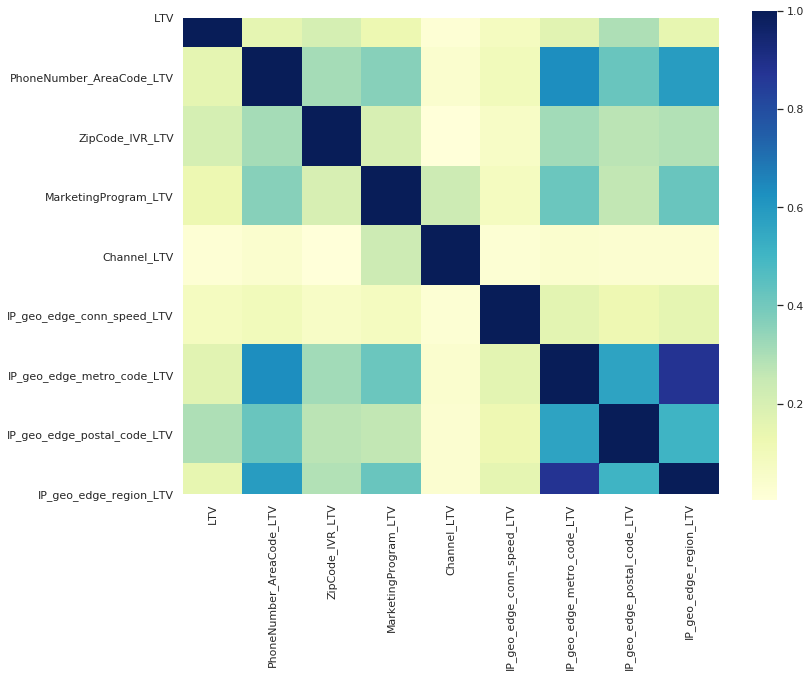

In [14]:
numeric_features = data_mean_enc.select_dtypes(include=[np.number])
corr = numeric_features.corr()
#numeric_features 
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu");

In [0]:
x = data_mean_enc.drop("LTV" ,axis=1)
y =  data_mean_enc["LTV"]

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x_scaled[0:3]

array([[ 0.0690032 ,  0.56374212, -2.5139683 , -8.31884588,  1.08966069,
         0.05423396,  0.23872817, -0.04078058],
       [ 0.48225114,  0.56374212,  1.22877164, -0.46883959,  1.08966069,
         0.05423396,  0.23872817, -0.04078058],
       [-0.26475219,  0.06127659,  1.36475193, -0.46883959,  1.08966069,
         0.05423396,  0.23872817, -0.04078058]])

In [18]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled_df.head(3)

,PhoneNumber_AreaCode_LTV,ZipCode_IVR_LTV,MarketingProgram_LTV,Channel_LTV,IP_geo_edge_conn_speed_LTV,IP_geo_edge_metro_code_LTV,IP_geo_edge_postal_code_LTV,IP_geo_edge_region_LTV
0,0.069003,0.563742,-2.513968,-8.318846,1.089661,0.054234,0.238728,-0.040781
1,0.482251,0.563742,1.228772,-0.468840,1.089661,0.054234,0.238728,-0.040781
2,-0.264752,0.061277,1.364752,-0.468840,1.089661,0.054234,0.238728,-0.040781


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


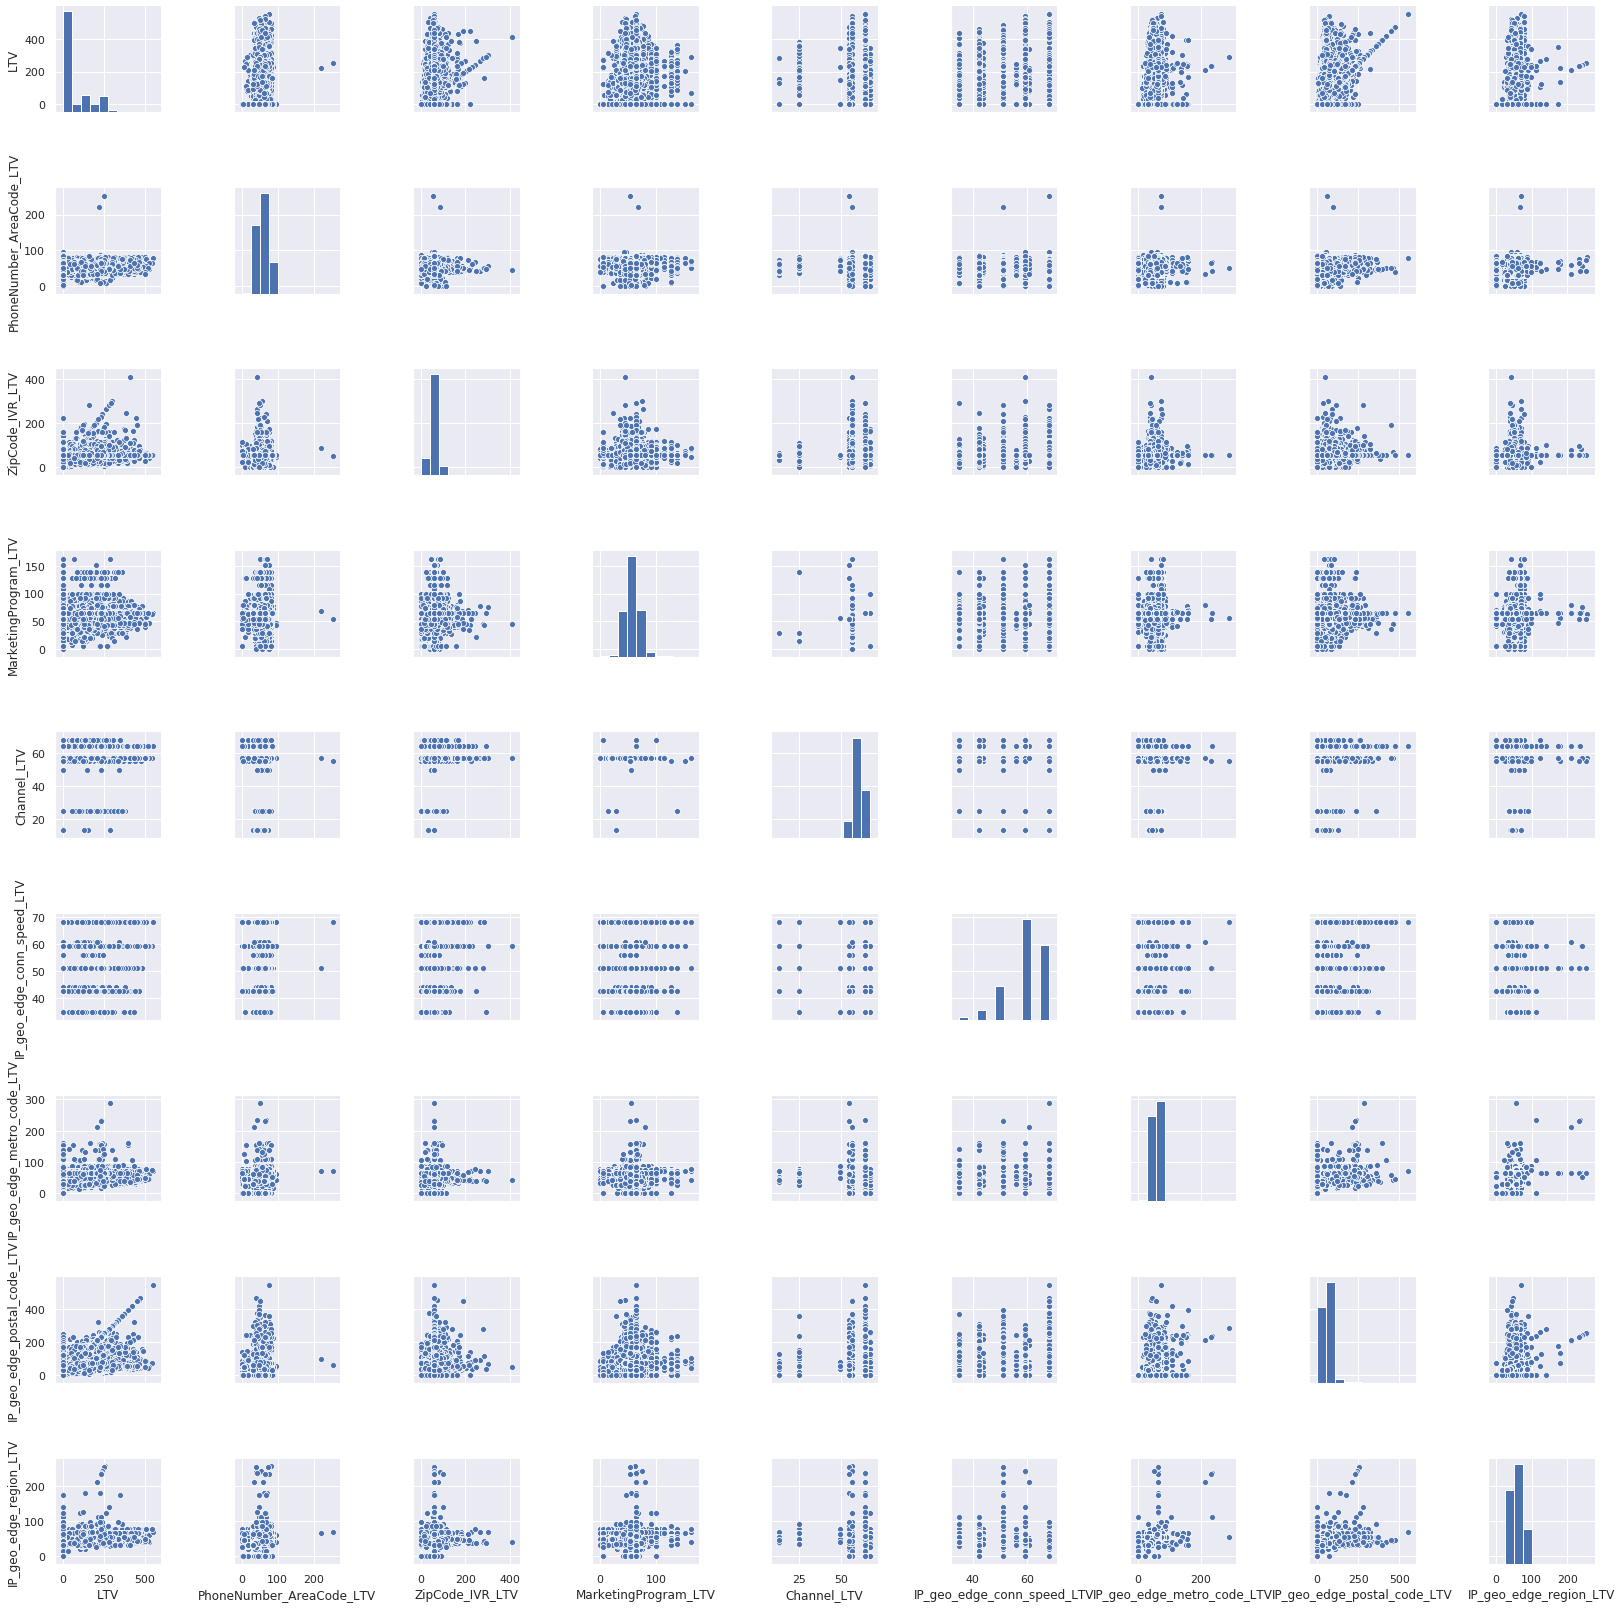

In [26]:
sns.pairplot(data_mean_enc,size=2.5)
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

In [31]:
lr.fit(x_scaled, y)
       

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
predicted_LTV = lr.predict(x_scaled)
#not mean encoded
pred_df = data_not_na.copy()
pred_df['Predcited_LTV'] = predicted_LTV
pred_df.head(3)

,PhoneNumber_AreaCode,MarketingProgram,Channel,ZipCode_IVR,LTV,IP_geo_edge_conn_speed,IP_geo_edge_metro_code,IP_geo_edge_postal_code,IP_geo_edge_region,Predcited_LTV
19,631.0,frontier my move,Movers MyMove,98021,343.2034,cable,819.0,98012,wa,65.791916
21,670.0,fuse-fr-frontier.com-RV-default,Partnership,unknown,0.0000,xdsl,803.0,92805,ca,83.815606
24,805.0,fuse-fr-frontier.com-RV-default,Partnership,unknown,0.0000,cable,803.0,92688,ca,76.336701


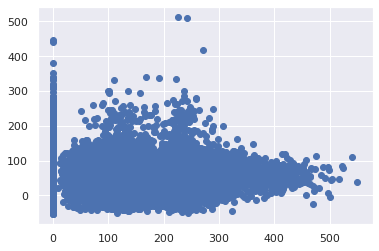

In [33]:
plt.scatter(pred_df['LTV'], pred_df['Predcited_LTV']);

In [37]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(pred_df['LTV'], pred_df['Predcited_LTV']);
MSE

9389.393522688582

In [42]:
x = sm.add_constant(x_scaled_df)
results = sm.OLS(y,x).fit()
results.summary()



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LTV   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     2043.
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:45:59   Log-Likelihood:            -7.7786e+05
No. Observations:              132249   AIC:                         1.556e+06
Df Residuals:                  132240   BIC:                         1.556e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          60.1446      0.239    252.169      0.000      59.677      60.612
PhoneNumber_AreaCode_LTV        2.4597      0.316      7.790      0.000       1.841       3.079
ZipCode_IVR_LTV                12.3804      0.256     48.281      0.000      11.878      12.883
MarketingProgram_LTV            4.2598      0.276     15.453      0.000       3.720       4.800
Channel_LTV                     0.1355      0.246      0.551      0.582      -0.347       0.618
IP_geo_edge_conn_speed_LTV      4.1647      0.242     17.208      0.000       3.690       4.639
IP_geo_edge_metro_code_LTV     -4.6027      0.543     -8.469      0.000      -5.668      -3.537
IP_geo_edge_postal_code_LTV    24.9387      0.292     85.289      0.000      24.366      25.512
IP_geo_edge_region_LTV         -2.2718      0.506     -4.490      0.000      -3.263      -1.280
==============================================================================
Omnibus:                    14797.337   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20477.252
Skew:                           0.964   Prob(JB):                         0.00
Kurtosis:                       2.996   Cond. No.                         5.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#Rando

In [0]:
Transform the LTV into catgories

In [0]:
from sklearn.preprocessing import KBinsDiscretizer

kbins_est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
LTV_bins = kbins_est.fit_transform(data_mean_enc[["LTV"]]).astype(int)

In [45]:
kbins_est.bin_edges_

array([array([  0.        , 110.03023834, 220.06047668, 330.09071502,
       440.12095336, 550.1511917 ])], dtype=object)

In [46]:
LTV_bins[:,0]

array([3, 2, 1, ..., 1, 0, 1])

In [47]:
# TODO 
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, verbose=1)
rf.fit(x_scaled, LTV_bins[:,0])
#y_pred = rf.predict(X_test)
predicted_LTV_bins = rf.predict(x_scaled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.4s finished


In [3]:
from sklearn.model_selection import cross_val_score
regression = svm.SVR(kernel='linear', C=1)
X_train, X_test, y_train, y_test = train_test_split(LTV_bins[:,0], x_scaled, test_size=0.4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
regression = svm.SVR(kernel='linear', C=1).rf.fit(x_scaled, LTV_bins[:,0])
regression.score(x_test, y_test)

NameError: ignored

In [48]:
predicted_LTV_bins

array([3, 2, 1, ..., 1, 0, 1])

In [49]:
predicted_LTV_bins == 0

array([False, False, False, ..., False,  True, False])

In [50]:
LTV_bins[:,0] == 0

array([False, False, False, ..., False,  True, False])

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(LTV_bins[:,0] == 0, predicted_LTV_bins == 0)

array([[29953,  7685],
       [ 1576, 93035]])

In [2]:
from sklearn.metrics import confusion_matrix

confusion_matrix(LTV_bins[:,0] == 4 , predicted_LTV_bins == 4)

NameError: ignored

In [52]:
from sklearn.metrics import classification_report

print(classification_report(LTV_bins[:,0], predicted_LTV_bins))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     94611
           1       0.94      0.78      0.85     21754
           2       0.93      0.79      0.85     15401
           3       0.97      0.67      0.79       431
           4       1.00      0.83      0.91        52

    accuracy                           0.93    132249
   macro avg       0.95      0.81      0.87    132249
weighted avg       0.93      0.93      0.92    132249



In [55]:
#pd.DataFrame(rf.feature_importances_, data_not_na.drop('LTV', axis=1).columns)
result = pd.DataFrame(rf.feature_importances_, data_not_na.drop('LTV', axis=1).columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False)

,feature
IP_geo_edge_postal_code,0.284904
PhoneNumber_AreaCode,0.196579
Channel,0.187995
MarketingProgram,0.174128
IP_geo_edge_metro_code,0.059914
IP_geo_edge_region,0.043560
IP_geo_edge_conn_speed,0.028478
ZipCode_IVR,0.024441


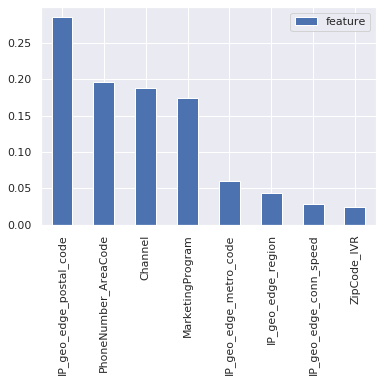

In [56]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

-----------------------------

In [0]:
# TODO
lr = LogisticRegression()
lr.fit(x, y)


In [0]:
confusion_matrix(y_test,y_pred)

In [0]:
data_cor = data_enc
data_cor.head(5)
#data_cor.shape

,BAUPriority,HasOrdered,LTV,PhoneNumber_AreaCode_LTV,ZipCode_IVR_LTV,MarketingProgram_LTV,Channel_LTV,IP_geo_edge_conn_speed_LTV,IP_geo_edge_metro_code_LTV,IP_geo_edge_postal_code_LTV,IP_geo_edge_region_LTV
0,50,1,343,67,75,64,70,68,61,68,59
1,50,0,0,63,75,63,63,68,61,68,59
2,50,1,84,46,62,63,63,68,61,68,59
3,50,0,0,46,62,63,63,68,61,68,59
4,50,0,0,46,62,63,63,68,61,68,59


In [0]:
data_cor.head(5)

,LTV,ZipCode_IVR_LTV,MarketingProgram_LTV,IP_geo_edge_conn_speed_LTV
0,343,75,64,68
1,0,75,63,68
2,84,62,63,68
3,0,62,63,68
4,0,62,63,68


In [0]:

#data_cor = data_cor.drop(("BAUPriority"), axis =1)
#data_cor = data_cor.drop(("HasOrdered"), axis =1)
#data_cor = data_cor.drop(("UA_ua_browserVersion"), axis =1)
#data_cor = data_cor.drop(("UA_ua_osName"), axis =1)
#data_cor = data_cor.drop(("UA_ua_primaryHardwareType"), axis =1)
#data_cor = data_cor.drop(("BAUPriority"), axis =1)
#data_cor = data_cor.drop(("IP_geo_edge_conn_speed_LTV"), axis =1)
#data_cor = data_cor.drop(("IP_geo_edge_metro_code_LTV"), axis =1)
#data_cor = data_cor.drop(("CallID"), axis =1)
#data_cor = data_cor.drop(("IP_geo_edge_postal_code_LTV"), axis =1)
#data_cor = data_cor.drop(("PhoneNumber_AreaCode_LTV"), axis =1)
#data_cor = data_cor.drop(("Channel_LTV"), axis =1)
#data_cor = data_cor.drop(("MarketingProgram_LTV"), axis =1)
#data_cor = data_cor.drop(("IP_geo_edge_region_LTV"), axis =1)


In [0]:
x = data_cor.drop("LTV" ,axis=1)
y =  data_cor["LTV"]

In [0]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions = lr.predict(x)
pred = data_new.copy()
pred['Predcited_LTV'] = predictions
pred.head(3)

,CallID,PhoneNumber_AreaCode,MarketingProgram,Channel,ZipCode_IVR,BAUPriority,HasOrdered,LTV,IP_geo_edge_conn_speed,IP_geo_edge_metro_code,IP_geo_edge_postal_code,IP_geo_edge_region,UA_ua_browserName,UA_ua_browserVersion,UA_ua_osName,UA_ua_primaryHardwareType,UA_ua_vendor,Predcited_LTV
19,1001279372I0191021,631,frontier my move,Movers MyMove,98021,50,1,343,cable,819.0,98012,wa,Internet Explorer,11,Windows 8.1,Desktop,Microsoft,177.846404
21,2001069209E0190902,670,fuse-fr-frontier.com-RV-default,Partnership,unknown,50,0,0,xdsl,803.0,92805,ca,Chrome,75.0.3770.142,Windows 7,Desktop,Google,6.768753
24,1001340066H0190925,805,fuse-fr-frontier.com-RV-default,Partnership,unknown,50,0,0,cable,803.0,92688,ca,Chrome,77.0.3865.90,Windows 10,Desktop,Google,169.592727


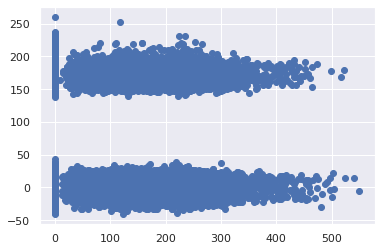

In [0]:
plt.scatter(pred['LTV'], pred['Predcited_LTV']);
#fig = plt.plot(pred['LTV'], pred['Predcited_LTV'], c='orange')
#plt.show()

In [0]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LTV   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 6.045e+04
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:17:03   Log-Likelihood:            -6.4442e+05
No. Observations:              127263   AIC:                         1.289e+06
Df Residuals:                  127252   BIC:                         1.289e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -64.3052      6.939     -9.267      0.000     -77.906     -50.705
BAUPriority                     0.0545      0.130      0.418      0.676      -0.201       0.310
HasOrdered                    169.0664      0.235    720.164      0.000     168.606     169.526
PhoneNumber_AreaCode_LTV        0.2779      0.009     30.141      0.000       0.260       0.296
ZipCode_IVR_LTV                 0.1168      0.006     20.361      0.000       0.106       0.128
MarketingProgram_LTV            0.2073      0.010     21.527      0.000       0.188       0.226
Channel_LTV                     0.0989      0.044      2.268      0.023       0.013       0.184
IP_geo_edge_conn_speed_LTV      0.0053      0.015      0.365      0.715      -0.023       0.034
IP_geo_edge_metro_code_LTV      0.1439      0.016      9.169      0.000       0.113       0.175
IP_geo_edge_postal_code_LTV     0.1645      0.005     33.658      0.000       0.155       0.174
IP_geo_edge_region_LTV          0.0418      0.016      2.546      0.011       0.010       0.074
==============================================================================
Omnibus:                    18191.378   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151903.151
Skew:                           0.434   Prob(JB):                         0.00
Kurtosis:                       8.281   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
predictions = lr.predict(x)
pred = data_new.copy()
pred['Predcited_LTV'] = predictions
pred.head(3)

,CallID,PhoneNumber_AreaCode,MarketingProgram,Channel,ZipCode_IVR,BAUPriority,HasOrdered,LTV,IP_geo_edge_conn_speed,IP_geo_edge_metro_code,IP_geo_edge_postal_code,IP_geo_edge_region,UA_ua_browserName,UA_ua_browserVersion,UA_ua_osName,UA_ua_primaryHardwareType,UA_ua_vendor,Predcited_LTV
19,1001279372I0191021,631,frontier my move,Movers MyMove,98021,50,1,343,cable,819.0,98012,wa,Internet Explorer,11,Windows 8.1,Desktop,Microsoft,82.520191
21,2001069209E0190902,670,fuse-fr-frontier.com-RV-default,Partnership,unknown,50,0,0,xdsl,803.0,92805,ca,Chrome,75.0.3770.142,Windows 7,Desktop,Google,77.085956
24,1001340066H0190925,805,fuse-fr-frontier.com-RV-default,Partnership,unknown,50,0,0,cable,803.0,92688,ca,Chrome,77.0.3865.90,Windows 10,Desktop,Google,57.527643


### Modeling